In [1]:
import sqlite3, os, sys, pickle
import pandas as pd
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [17]:
transform_path='../db_files/rasmus/transformers.pkl'
db_path= '../db_files/rasmus/rasmus_pred.db'

In [18]:
conn = sqlite3.connect(db_path)

In [19]:
cursor = conn.cursor()

In [22]:
cursor. execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

[('truth',), ('features',)]


In [21]:
# feat=["dom_x", "dom_y", "dom_z", "dom_time", "charge_log10", "width", "rqe"]
df_feat=pd.read_sql("select * from truth limit 100", conn)
df_feat.columns

Index(['event_no', 'energy_log10', 'position_x', 'position_y', 'position_z',
       'azimuth', 'zenith', 'pid', 'event_time', 'sim_type', 'azimuth_retro',
       'time_retro', 'energy_log10_retro', 'position_x_retro',
       'position_y_retro', 'position_z_retro', 'zenith_retro', 'azimuth_sigma',
       'position_x_sigma', 'position_y_sigma', 'position_z_sigma',
       'time_sigma', 'zenith_sigma', 'energy_log10_sigma', 'osc_weight',
       'interaction_type'],
      dtype='object')

In [8]:
import pandas as pd
def get_event_no():
        print('Reading sets')
        sets = pd.read_pickle('../db_files/dev_lvl7/sets.pkl')
        train_events = sets['train']
        test_events = sets['test']
        return train_events['event_no'].to_numpy(), test_events['event_no'].to_numpy()
train_events, test_events=get_event_no()

Reading sets


In [9]:
# targets= ["energy_log10", "zenith","azimuth"]
# target_call  = ", ".join(targets)
# df_truth=pd.read_sql(f"select {target_call}, event_no,pid from truth", conn)
# df_truth

In [15]:
df_truth=pd.read_sql(f"select * from truth where event_no in {tuple(test_events)}", conn)
cols=df_truth.columns

,event_no,energy_log10,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,...,position_y_sigma,position_z_sigma,time_sigma,zenith_sigma,energy_log10_sigma,osc_weight,interaction_type,elasticity,lvl7_probnu,lvl4_probnu
0,890001,-0.441437,0.643839,-0.141157,-0.453423,-0.200505,-0.941708,-14,1.087909e+17,genie,...,2.105354,0.888275,9.478516,0.100220,0.775002,5.170306e-07,1,-0.512261,0.279743,0.239842
1,890002,-0.003176,1.119062,-0.412751,-0.177144,-0.905742,-0.044677,-14,1.087909e+17,genie,...,6.747589,3.964355,14.840820,0.277464,2.979291,9.270373e-07,1,-0.406939,0.188015,-0.093930
2,890005,0.125159,-0.732908,-0.414327,-0.897714,0.129592,0.955679,-14,1.087909e+17,genie,...,0.321205,1.276001,14.208008,0.026136,0.543346,4.593662e-08,1,-0.216734,0.463988,0.416724
3,890008,0.185702,0.412762,-1.269014,1.050416,0.419824,-0.435551,14,1.087909e+17,genie,...,11.383873,4.692078,12.465820,0.128765,0.698667,7.431805e-07,1,-0.561419,-1.032259,-1.420656
4,890011,0.120804,0.372697,1.911024,-0.573592,-0.362099,-0.450052,14,1.087909e+17,genie,...,31.229164,15.577087,153.835938,0.201630,5.655249,7.357052e-07,1,-0.319579,-1.020791,-0.554056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658357,7635127,-0.172270,0.423944,0.914388,0.431136,-0.227972,-0.052455,12,1.087909e+17,genie,...,20.276513,7.205688,73.976562,0.528542,3.580770,3.598772e-07,1,1.386665,-1.956711,-1.288728
1658358,7635128,0.508978,-0.496556,-0.913474,0.152495,0.017271,0.877638,-12,1.087909e+17,genie,...,3.832886,1.567505,8.981445,0.178427,1.800573,3.693625e-08,1,0.441571,-1.467892,-2.519628
1658359,7635132,0.113620,0.403041,0.459651,0.190319,0.407929,0.055036,12,1.087909e+17,genie,...,7.209063,8.768372,23.276367,0.232988,1.569021,2.035631e-07,1,-0.603479,-0.111391,-0.085523
1658360,7635137,-0.169711,-0.269738,-0.250571,0.058395,0.285293,-0.168473,-12,1.087909e+17,genie,...,4.154953,4.116791,11.160156,0.240992,2.925443,3.811419e-07,1,0.153087,0.426465,-0.363308


In [16]:
df_truth.sort_values(by='event_no')

,event_no,energy_log10,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,...,position_y_sigma,position_z_sigma,time_sigma,zenith_sigma,energy_log10_sigma,osc_weight,interaction_type,elasticity,lvl7_probnu,lvl4_probnu
758122,8,-1.344412,-0.809322,-0.541318,-0.009227,0.208109,-0.243922,-14,1.087909e+17,genie,...,6.952522,3.564056,34.441406,0.333950,2.176493,8.048285e-07,1,-0.209022,0.250243,0.319580
758123,10,-1.168419,0.910491,-0.382250,-0.150077,0.797508,0.631721,14,1.087909e+17,genie,...,10.989208,8.070496,37.034180,0.234389,0.976629,2.249167e-07,1,-0.653041,0.275743,0.453825
758124,15,-1.290292,-0.019227,0.883341,0.199310,-0.596888,-0.035944,14,1.087909e+17,genie,...,6.814346,3.320587,37.824219,0.103806,1.587005,3.752565e-08,1,-0.115829,0.238741,0.332233
758125,29,-1.647346,0.851119,-0.257713,-0.532190,-0.933608,1.118101,-14,1.087909e+17,genie,...,11.710121,2.305054,30.969727,0.289428,1.336768,4.494020e-07,1,1.027427,0.074667,0.470918
758126,32,-1.165012,-0.892836,-0.492865,0.261180,0.298791,0.206168,14,1.087909e+17,genie,...,6.501472,1.657043,16.234375,0.112817,0.781923,5.318767e-07,1,-0.453342,0.137343,0.431267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237455,117104746,1.622408,8.430828,-0.691152,4.682264,0.913645,-0.717201,13,1.087909e+17,muongun,...,7.082050,7.532394,20.564453,0.129756,2.571375,1.002863e-04,-1,-2.781719,-2.189187,-2.607205
1237456,117104747,1.531709,4.393672,-6.200667,1.037356,0.673102,-0.622303,13,1.087909e+17,muongun,...,30.981434,21.288361,161.875977,0.366958,13.713753,3.080043e-05,-1,-2.781719,-0.494526,-2.899090
1237457,117104750,1.572207,-3.597107,-7.007972,4.113646,0.396452,-0.795468,13,1.087909e+17,muongun,...,15.737572,14.672882,109.399414,0.670685,7.252653,8.596824e-05,-1,-2.781719,-1.000318,-0.505629
1237458,117104752,1.608613,0.108767,8.264797,5.181057,-0.492953,-0.760775,13,1.087909e+17,muongun,...,6.459644,6.711639,19.122070,0.842007,5.029810,1.089017e-04,-1,-2.781719,-1.968466,-2.327189


In [18]:
df_truth.drop('position_x', axis=1)

,event_no,energy_log10,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,azimuth_retro,...,position_y_sigma,position_z_sigma,time_sigma,zenith_sigma,energy_log10_sigma,osc_weight,interaction_type,elasticity,lvl7_probnu,lvl4_probnu
0,890001,-0.441437,-0.141157,-0.453423,-0.200505,-0.941708,-14,1.087909e+17,genie,3.745607,...,2.105354,0.888275,9.478516,0.100220,0.775002,5.170306e-07,1,-0.512261,0.279743,0.239842
1,890002,-0.003176,-0.412751,-0.177144,-0.905742,-0.044677,-14,1.087909e+17,genie,6.164294,...,6.747589,3.964355,14.840820,0.277464,2.979291,9.270373e-07,1,-0.406939,0.188015,-0.093930
2,890005,0.125159,-0.414327,-0.897714,0.129592,0.955679,-14,1.087909e+17,genie,3.689882,...,0.321205,1.276001,14.208008,0.026136,0.543346,4.593662e-08,1,-0.216734,0.463988,0.416724
3,890008,0.185702,-1.269014,1.050416,0.419824,-0.435551,14,1.087909e+17,genie,3.301483,...,11.383873,4.692078,12.465820,0.128765,0.698667,7.431805e-07,1,-0.561419,-1.032259,-1.420656
4,890011,0.120804,1.911024,-0.573592,-0.362099,-0.450052,14,1.087909e+17,genie,1.953374,...,31.229164,15.577087,153.835938,0.201630,5.655249,7.357052e-07,1,-0.319579,-1.020791,-0.554056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658357,7635127,-0.172270,0.914388,0.431136,-0.227972,-0.052455,12,1.087909e+17,genie,0.137806,...,20.276513,7.205688,73.976562,0.528542,3.580770,3.598772e-07,1,1.386665,-1.956711,-1.288728
1658358,7635128,0.508978,-0.913474,0.152495,0.017271,0.877638,-12,1.087909e+17,genie,2.804597,...,3.832886,1.567505,8.981445,0.178427,1.800573,3.693625e-08,1,0.441571,-1.467892,-2.519628
1658359,7635132,0.113620,0.459651,0.190319,0.407929,0.055036,12,1.087909e+17,genie,4.251538,...,7.209063,8.768372,23.276367,0.232988,1.569021,2.035631e-07,1,-0.603479,-0.111391,-0.085523
1658360,7635137,-0.169711,-0.250571,0.058395,0.285293,-0.168473,-12,1.087909e+17,genie,3.770832,...,4.154953,4.116791,11.160156,0.240992,2.925443,3.811419e-07,1,0.153087,0.426465,-0.363308


In [77]:
np.corrcoef(df_truth['event_no'], df_truth['pid'])

array([[1.       , 0.0800872],
       [0.0800872, 1.       ]])

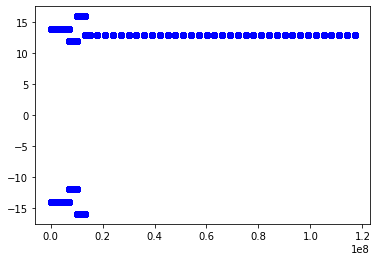

In [79]:
plt.plot(df_truth['event_no'], df_truth['pid'], 'bo')

In [37]:
x=np.array(df_truth.event_no.to_numpy())
id_test=

In [47]:
vals, counts=np.unique(x, return_counts=True)

In [21]:
transformers = pickle.load(open(transform_path, 'rb'))
trans_x      = transformers['features']
trans_y      = transformers['truth']

for col in targets:
    df_truth[col] = trans_y[col].inverse_transform(np.array(df_truth[col]).reshape(1, -1)).T

In [98]:
df_sort=df_truth.sort_values('event_no')
df_sort=df_sort.reset_index(drop=True)
df_test=df_sort[df_sort['event_no'].isin(test_events)]
df_train=df_sort[df_sort['event_no'].isin(train_events)]
testid, trainid=df_test.index.to_numpy(), df_train.index.to_numpy()

In [82]:
splits=np.array_split(np.sort(df_truth['event_no'].to_numpy()),10)
start_ids, stop_ids=[],[]
for i in range(10):
    start_ids.append(splits[i][0])
    stop_ids.append(splits[i][-1])

In [84]:
start_ids, stop_ids

([0,
  829181,
  3049862,
  3879043,
  6101874,
  6931054,
  9113884,
  9943064,
  10772244,
  12520047],
 [829180,
  3049861,
  3879042,
  6101873,
  6931053,
  9113883,
  9943063,
  10772243,
  12520046,
  117104763])

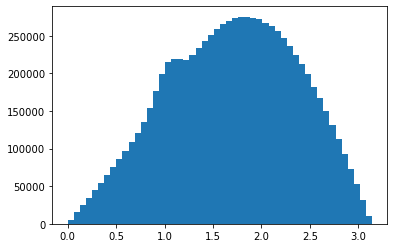

In [22]:
plt.hist(df_truth.zenith, bins=50);

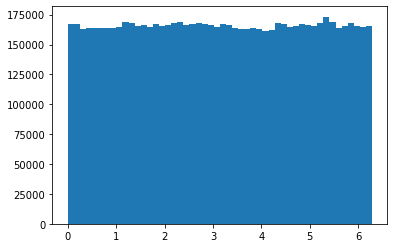

In [23]:
plt.hist(df_truth.azimuth, bins=50);

In [13]:
n_data = 100
start_id = conn.execute(f"select distinct event_no from truth where pid = 13")
stop_id  = conn.execute(f"select distinct event_no from truth where pid = 13 limit 1 offset {n_data}")

In [15]:
start_id.fetchall()

[]

In [12]:
stop_id.fetchall()

[(138674472,)]

In [16]:
start, stop = 0, 100000
# start_id  = conn.execute(f"select distinct event_no from features where pid = 13 limit ")
event_nos = pd.read_sql(f"select distinct event_no from features limit {stop} offset {start}", conn)

In [17]:
event_nos

,event_no
0,120102888
1,120102889
2,120102890
3,120102891
4,120102892
...,...
99995,120228027
99996,120228028
99997,120228029
99998,120228030


In [23]:
start, stop = 0, 100000
select_rows = ["dom_x", "dom_y", "dom_z", "time", "charge_log10"]

start_id = conn.execute(f"select distinct event_no from features limit 1 offset {start}").fetchall()[0][0]
stop_id  = conn.execute(f"select distinct event_no from features limit 1 offset {stop}").fetchall()[0][0]

In [24]:
features = ["dom_x", "dom_y", "dom_z", "time", "charge_log10"]
targets  = ["energy_log10", "position_x", "position_y", "position_z", "direction_x", "direction_y", "direction_z"]
feature_call = ", ".join(features)
target_call  = ", ".join(targets)
df_event = pd.read_sql(f"select event_no       from features where event_no >= {start_id} and event_no < {stop_id}", conn)
df_feat  = pd.read_sql(f"select {feature_call} from features where event_no >= {start_id} and event_no < {stop_id}", conn)
df_targ  = pd.read_sql(f"select {target_call } from truth    where event_no >= {start_id} and event_no < {stop_id}", conn)

In [25]:
idx_list    = np.array(df_event)
x_not_split = np.array(df_feat)

In [30]:
np.shape(idx_list)

(5965924, 1)

In [31]:
ids, idx, counts = np.unique(idx_list.flatten(), return_index = True, return_counts = True) 

In [29]:
np.sum(counts)

5965924

In [34]:
x_not_split.shape

(5965924, 5)

In [35]:
xs = np.split(x_not_split, np.cumsum(counts))

In [61]:
ys = np.array(df_targ)

In [43]:
np.shape(xs)

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(100001,)

In [24]:
for x, y in zip(xs, ys):
    print(x, y)
    break

[[-1.84428951 -1.22482404  0.39792449 -1.56428307  0.16261479]
 [-0.2078301  -0.18691354 -0.44418075 -1.68247499 -1.92155384]
 [ 0.06322446 -0.29591152 -0.46829432 -0.05335309 -0.38592265]
 [ 0.06322446 -0.29591152 -0.14411839  0.90848462  0.23806267]
 [ 0.06322446 -0.29591152 -0.14411839 -1.41830308  1.49374495]
 [ 0.06322446 -0.29591152 -0.08772599 -0.02074843 -1.65692291]
 [ 0.06322446 -0.29591152 -0.08772599 -0.03223416  0.44497857]
 [ 0.          0.29478052 -0.12298133  0.44979622 -0.38592265]
 [-0.04194698 -0.15939176 -0.25229772 -0.30048166  0.        ]
 [-0.04194698 -0.15939176 -0.23821973 -0.30085217  0.89259397]
 [-0.04194698 -0.15939176 -0.2241216  -0.29529455 -1.0557719 ]
 [-0.04194698 -0.15939176 -0.1818273  -0.26083735 -0.62103541]
 [-0.07899002  2.28041226  1.09275381  1.07373101  0.50835111]
 [ 0.74159036  1.95723031  0.97476017  1.00629863  0.68454405]
 [-0.25763961  1.79339814  0.32990768  0.42645424  0.31007972]
 [-0.25763961  1.79339814  0.32990768 -1.44942571  0.08

In [63]:
from sklearn.neighbors import kneighbors_graph as knn
from spektral.data import Graph
neighbors=6

In [65]:
print("Generating adjacency matrices")
graph_list = []
for x, y in tqdm(zip(xs, ys), total = len(xs)):
    a = knn(x[:, :3], neighbors)



    graph_list.append(Graph(x = x, a = a, y = y))

graph_list = np.array(graph_list, dtype = object)

Generating adjacency matrices


In [51]:
s = [x.shape[0] for x in xs]

In [ ]:
xs = np.array(xs, dtype = object)[np.argsort(s)]

In [57]:
size, idx = np.unique(np.sort(s), return_index = True)

In [ ]:
preprocess(list(xs[4: 9]))

In [53]:
np.sort(s)

array([ 14,  19,  19, ..., 822, 876, 913])

In [46]:
idx

array([    0,     1,     4,     9,    21,    45,    85,   143,   244,
         401,   652,  1016,  1483,  2097,  2924,  4001,  5282,  6731,
        8466, 10599, 13093, 15805, 18756, 21801, 24937, 28170, 31567,
       34857, 38137, 41355, 44535, 47573, 50422, 53228, 55770, 58086,
       60383, 62484, 64403, 66274, 67917, 69509, 70992, 72361, 73664,
       74887, 75978, 76999, 77932, 78771, 79617, 80384, 81125, 81818,
       82484, 83089, 83658, 84237, 84756, 85227, 85712, 86149, 86570,
       86957, 87318, 87719, 88092, 88425, 88746, 89059, 89334, 89610,
       89868, 90105, 90354, 90606, 90834, 91059, 91268, 91484, 91711,
       91916, 92108, 92283, 92486, 92656, 92805, 92975, 93132, 93295,
       93449, 93584, 93732, 93878, 94005, 94124, 94236, 94346, 94449,
       94538, 94645, 94733, 94844, 94928, 95026, 95123, 95213, 95306,
       95396, 95483, 95584, 95668, 95763, 95835, 95906, 95966, 96052,
       96127, 96195, 96259, 96320, 96387, 96454, 96511, 96563, 96613,
       96675, 96739,

In [9]:
import pickle
transformers = pickle.load(open('../db_files/muongun/transformers.pkl', 'rb'))
trans_x      = transformers['features']
trans_y      = transformers['truth']

C:\Users\chris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RobustScaler from version 0.19.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [12]:
help(transformers['features']['dom_x'])

Help on RobustScaler in module sklearn.preprocessing._data object:

class RobustScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
 |  
 |  Scale features using statistics that are robust to outliers.
 |  
 |  This Scaler removes the median and scales the data according to
 |  the quantile range (defaults to IQR: Interquartile Range).
 |  The IQR is the range between the 1st quartile (25th quantile)
 |  and the 3rd quartile (75th quantile).
 |  
 |  Centering and scaling happen independently on each feature by
 |  computing the relevant statistics on the samples in the training
 |  set. Median and interquartile range are then stored to be used on
 |  later data using the ``transform`` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators. Typically this is done by removing the mean
 |  and scaling to unit variance. H